In [61]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# Data

In [62]:
#format data - from imputation project 
gas_data = pd.read_csv("gas_price_data.txt", delimiter='\t', header= 2) #read file
#seperate values by commas (read as csv), seperate lines by tab (delimiter = '\t') and ignore the first 2 lines (header = 2)

#give header name for easy access
gas_data = gas_data.rename(columns={'Unnamed: 0':'Date'}) 
gas_data["Date"] = pd.to_datetime(gas_data["Date"], format = "%b %d, '%y") #convert dates to YYYY-MM-DD format - looks better

#make a list of indexes - the x values 
nums = gas_data.index

#save price data to arrays - the y values
known_diesel_price = np.array(gas_data["Diesel"])  
known_regular_price = np.array(gas_data["Regular"])

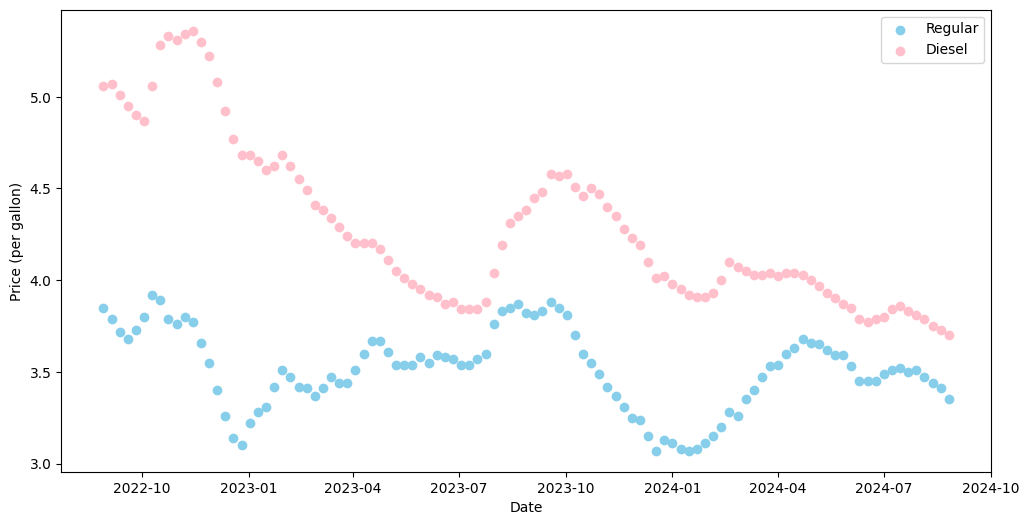

In [63]:
#plot points 
plt.figure(figsize=(12,6))
plt.scatter(gas_data["Date"], known_regular_price, color = "skyblue", label = "Regular")
plt.scatter(gas_data["Date"], known_diesel_price, color = "pink", label = "Diesel") 
plt.xlabel("Date")
plt.ylabel("Price (per gallon)")
plt.legend()
plt.show()

# $6^{th}$ Degree Polynomial

$f(x) = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$ <br><br>
$f'_a(x) = x^6 $ <br>
$f'_b(x) = x^5 $ <br>
$f'_c(x) = x^4 $ <br>
$f'_d(x) = x^3 $ <br>
$f'_e(x) = x^2 $ <br>
$f'_f(x) = x $ <br>
$f'_g(x) = 0 $ <br>


In [64]:
def poly_function(a: float, b:float, c:float, d:float, e:float, f:float, g:float, x: np.array) -> np.array: 
    return (a * x**6) + (b * x**5) + (c * x**4) + (d * x**3) + (e * x**2) + (f * x) + e

# Sin Function 

$ f(x) = (a +bx)sin(cx+d) $ 
<br><br>
Partial Derivatives: <br>
$ f_{a}'(x) = sin(cx+d) $ <br>
$ f_{b}'(x) = xsin(cx+d)$ <br>
$ f_{c}'(x) = x(a+bx)cos(cx+d)$ <br>
$ f_{d}'(x) = (a+bx)cos(cx + d)$ <br>

In [65]:
def sin_function(a: float, b: float, c:float, d:float, x: np.array) -> np.array: 
    """return the value of the gas trend function"""
    return (a + b * x) * np.sin(c * x + b)

# Mean Absolute Error
$ E = \frac{1}{n}\sum{|(y_{i} - \hat{y_{i}})|} $

In [66]:
def poly_mean_absolute_error(a: float, b: float, c: float, d: float, e:float, f:float, g:float, x:np.array, y:np.array, f_x: callable): 
    '''Use mean absolute error to determine close match for coeffecients a, b, c, and d'''
    # Hyperparameters
    learning_rate = 0.00001
    epochs = 1000

    # Number of samples
    n = len(x)
    
    #show starting parameters
    print(f"Starting parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}, e = {e:.4f}, f = {f:.4f}, g = {g:.4f}")

    # Gradient descent loop
    for epoch in range(epochs):
        # Predictions (applying the model to the input data) - use trend functiom 
        y_pred = f_x(a, b, c, d, e, f, g, x)
        
        # The derivatives of each parameter - derivative of error function
        
        da = (1/n) * np.sum(np.sign(y - y_pred) * x**6) #with repect to a - x**6 from chain rule
        db = (1/n) * np.sum(np.sign(y - y_pred) * x**5) #with repect to b - x**5 from chain rule 
        dc = (1/n) * np.sum(np.sign(y - y_pred) * x**4) #with respect to c - x**5 from chain rule
        dd = (1/n) * np.sum(np.sign(y - y_pred) * x**3)
        de = (1/n) * np.sum(np.sign(y - y_pred) * x**2)
        df = (1/n) * np.sum(np.sign(y - y_pred) * x)
        dg = (1/n) * np.sum(np.sign(y - y_pred))
        
        # Adjust the parameters with the derviatives adjusted according to the learning rate 
        a = a - learning_rate * da 
        b = b - learning_rate * db 
        c = c - learning_rate * dc 
        d = d - learning_rate * dd 
        e = d - learning_rate * de
        f = f - learning_rate * df
        g = g - learning_rate * dg
        
        # Print progress every 100 epochs -- so we see if we're actually making progress
        if epoch % 100 == 0:
            loss = np.mean((y - y_pred) ** 2)
            print(f"Epoch {epoch}: Loss = {loss:.4f}, a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}, e = {e:.4f}, f = {f:.4f}, g = {g:.4f}")

    # Final parameters
    print(f"Final parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}, e = {e:.4f}, f = {f:.4f}, g = {g:.4f}")
    return a, b, c, d, e, f, g

# Gradient Descent - $6^{th}$ Degree Polynomial #

In [67]:
# choose starting values of coefficients 
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
e = np.random.randn()
f = np.random.randn()
g = np.random.randn()

In [68]:
a_reg, b_reg, c_reg, d_reg, e_reg, f_reg, g_reg = poly_mean_absolute_error(a, b, c, d, e, f, g, nums, known_regular_price, poly_function)

Starting parameters: a = 1.0574, b = -1.0234, c = 0.5453, d = -0.3042, e = 0.3376, f = -0.0505, g = -0.0139
Epoch 0: Loss = 142193028033033451601920.0000, a = 1851217.0578, b = 20667.4062, c = 237.8952, d = 2.5350, e = 2.5712, f = -0.0500, g = -0.0139
Epoch 100: Loss = 4447698761245338515671164856893150593024.0000, a = 186972817.0953, b = 2087510.3662, c = 23972.8827, d = 286.4550, e = 286.4912, f = 0.0020, g = -0.0129
Epoch 200: Loss = 17790794944388466926242262348842202562560.0000, a = 372094417.1328, b = 4154353.3262, c = 47707.8701, d = 570.3750, e = 570.4112, f = 0.0540, g = -0.0119
Epoch 300: Loss = 40029288549429298793517190029861164417024.0000, a = 557216017.1703, b = 6221196.2862, c = 71442.8576, d = 854.2950, e = 854.3312, f = 0.1060, g = -0.0109
Epoch 400: Loss = 71163179576368852637498973225029726109696.0000, a = 742337617.2079, b = 8288039.2462, c = 95177.8451, d = 1138.2150, e = 1138.2512, f = 0.1580, g = -0.0099
Epoch 500: Loss = 11119246802520670291629910758487839106662

In [69]:
a_die, b_die, c_die, d_die, e_die, f_die, g_die = poly_mean_absolute_error(a, b, c, d, e, f, g, nums, known_diesel_price, poly_function)

Starting parameters: a = 1.0574, b = -1.0234, c = 0.5453, d = -0.3042, e = 0.3376, f = -0.0505, g = -0.0139
Epoch 0: Loss = 142193028032873564733440.0000, a = 1851217.0578, b = 20667.4062, c = 237.8952, d = 2.5350, e = 2.5712, f = -0.0500, g = -0.0139
Epoch 100: Loss = 4447698761245338515671164856893150593024.0000, a = 186972817.0953, b = 2087510.3662, c = 23972.8827, d = 286.4550, e = 286.4912, f = 0.0020, g = -0.0129
Epoch 200: Loss = 17790794944388466926242262348842202562560.0000, a = 372094417.1328, b = 4154353.3262, c = 47707.8701, d = 570.3750, e = 570.4112, f = 0.0540, g = -0.0119
Epoch 300: Loss = 40029288549429298793517190029861164417024.0000, a = 557216017.1703, b = 6221196.2862, c = 71442.8576, d = 854.2950, e = 854.3312, f = 0.1060, g = -0.0109
Epoch 400: Loss = 71163179576368852637498973225029726109696.0000, a = 742337617.2079, b = 8288039.2462, c = 95177.8451, d = 1138.2150, e = 1138.2512, f = 0.1580, g = -0.0099
Epoch 500: Loss = 11119246802520670291629910758487839106662

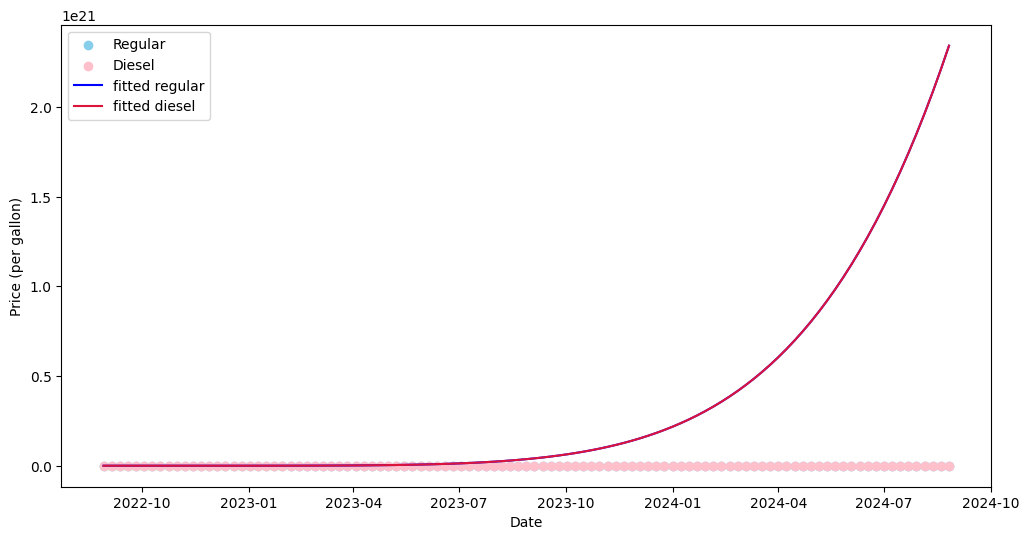

In [70]:

#graph 
plt.figure(figsize=(12,6))
plt.scatter(gas_data["Date"], known_regular_price, color = "skyblue", label="Regular") #plot known points 
plt.scatter(gas_data["Date"], known_diesel_price, color = "pink", label= "Diesel") 
plt.plot(gas_data["Date"], poly_function(a_reg, b_reg, c_reg, d_reg, e_reg, f_reg, g_reg, nums), color ="blue", label ="fitted regular")
plt.plot(gas_data["Date"], poly_function(a_die, b_die, c_die, d_die, e_die, f_die, g_die, nums), color = "crimson", label = "fitted diesel")
plt.xlabel("Date")
plt.ylabel("Price (per gallon)")
plt.legend()
plt.show()

# Mean Squared Error

$ E = \frac{1}{n}\sum{(y_{i} - \hat{y_{i}})^2} $

In [71]:

def sin_mean_squared_error(a: float, b: float, c: float, d: float, x:np.array, y:np.array, f: callable): 
    '''Use mean absolute error to determine close match for coeffecients a, b, c, and d'''
    # Hyperparameters
    learning_rate = 0.1
    epochs = 1000

    # Number of samples
    n = len(x)
    
    #normalize x values to prevent overflow 
    x = x/np.max(x)
    
    #show starting parameters
    print(f"Starting parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}")

    # Gradient descent loop
    for epoch in range(epochs):
        # Predictions (applying the model to the input data) - use trend functiom 
        y_pred = f(a, b, c, d, x)
        
        # The derivatives of each parameter - derivative of error function
        
        da = (1/n) * np.sum(2 * (y - y_pred) * np.sin((c * x) + d)) #with respect to a 
        db = (1/n) * np.sum(2 * (y-y_pred) * np.sin((c *x) + d) * x) # with respect to b 
        dc = (1/n) * np.sum(2 * (y-y_pred) * x * (a + b * x) * np.cos(c * x + d)) # with respect to c 
        dd = (1/n) * np.sum(2 * (y-y_pred) * (a + b * x) * np.cos(c * x + d)) # with respect to d
        
        
        # Adjust the parameters with the derviatives adjusted according to the learning rate 
        a = a - learning_rate * da 
        b = b - learning_rate * db 
        c = c - learning_rate * dc 
        d = d - learning_rate * dd 
        
        
        # Print progress every 100 epochs -- so we see if we're actually making progress
        if epoch % 100 == 0:
            loss = np.mean((y - y_pred) ** 2)
            print(f"Epoch {epoch}: Loss = {loss:.4f}, a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}")

    # Final parameters
    print(f"Final parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}")
    return a, b, c, d 

# Gradient Descent - Sin Function

In [72]:
# choose starting values of a, b, c, and d 
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

In [73]:
a_reg, b_reg, c_reg, d_reg = sin_mean_squared_error(a, b, c, d, nums, known_regular_price, sin_function)

Starting parameters: a = 1.6760, b = 1.2021, c = -0.7092, d = 0.7732
Epoch 0: Loss = 3.6250, a = 1.5255, b = 1.1486, c = -1.1558, d = -0.0066
Epoch 100: Loss = 0.0773, a = 3.2350, b = 1.5937, c = -0.8926, d = -1.9053
Epoch 200: Loss = 0.0600, a = 3.3959, b = 1.4221, c = -0.6894, d = -2.0167
Epoch 300: Loss = 0.0537, a = 3.5356, b = 1.3127, c = -0.5705, d = -1.9920
Epoch 400: Loss = 0.0506, a = 3.6649, b = 1.2310, c = -0.4885, d = -1.9365
Epoch 500: Loss = 0.0488, a = 3.7884, b = 1.1649, c = -0.4269, d = -1.8776
Epoch 600: Loss = 0.0476, a = 3.9087, b = 1.1088, c = -0.3781, d = -1.8238
Epoch 700: Loss = 0.0468, a = 4.0273, b = 1.0599, c = -0.3381, d = -1.7774
Epoch 800: Loss = 0.0462, a = 4.1453, b = 1.0162, c = -0.3045, d = -1.7387
Epoch 900: Loss = 0.0458, a = 4.2636, b = 0.9766, c = -0.2759, d = -1.7069
Final parameters: a = 4.3813, b = 0.9406, c = -0.2513, d = -1.6815


In [74]:
a_dis, b_dis, c_dis, d_dis = sin_mean_squared_error(a, b, c, d, nums, known_diesel_price, sin_function)

Starting parameters: a = 1.6760, b = 1.2021, c = -0.7092, d = 0.7732
Epoch 0: Loss = 7.2918, a = 1.4528, b = 1.1282, c = -1.2902, d = -0.2974
Epoch 100: Loss = 0.1533, a = 4.3855, b = 1.5143, c = -0.9131, d = -2.1161
Epoch 200: Loss = 0.1079, a = 4.7896, b = 1.2609, c = -0.6380, d = -1.9077
Epoch 300: Loss = 0.0932, a = 5.2216, b = 1.0942, c = -0.4855, d = -1.7534
Epoch 400: Loss = 0.0864, a = 5.6930, b = 0.9654, c = -0.3840, d = -1.6730
Epoch 500: Loss = 0.0828, a = 6.2081, b = 0.8599, c = -0.3115, d = -1.6319
Epoch 600: Loss = 0.0808, a = 6.7680, b = 0.7712, c = -0.2576, d = -1.6094
Epoch 700: Loss = 0.0797, a = 7.3731, b = 0.6954, c = -0.2166, d = -1.5963
Epoch 800: Loss = 0.0791, a = 8.0222, b = 0.6301, c = -0.1846, d = -1.5882
Epoch 900: Loss = 0.0788, a = 8.7131, b = 0.5735, c = -0.1595, d = -1.5830
Final parameters: a = 9.4354, b = 0.5247, c = -0.1395, d = -1.5796


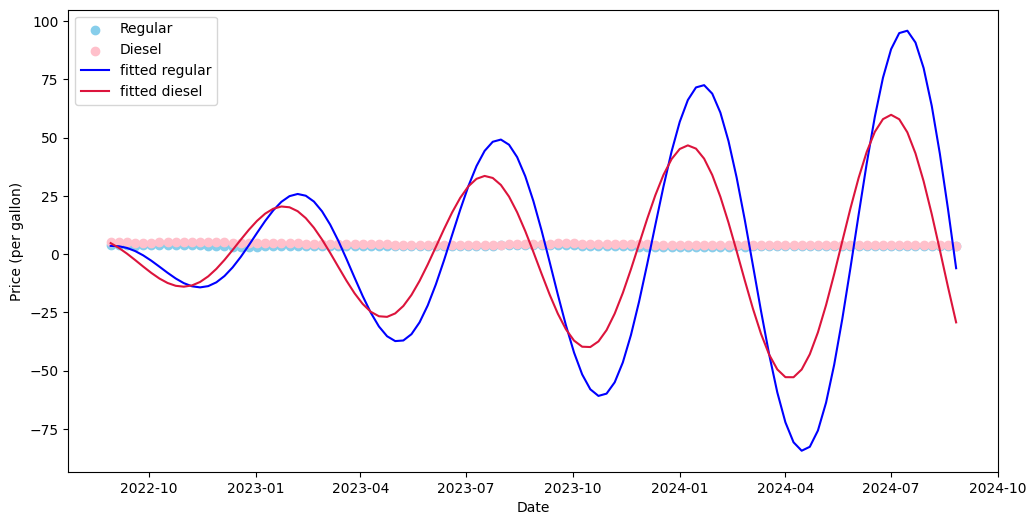

In [75]:
#graph 
plt.figure(figsize=(12,6))
plt.scatter(gas_data["Date"], known_regular_price, color = "skyblue", label="Regular") #plot known points 
plt.scatter(gas_data["Date"], known_diesel_price, color = "pink", label= "Diesel") 
plt.plot(gas_data["Date"], sin_function(a_reg, b_reg, c_reg, d_reg, nums), color ="blue", label ="fitted regular")
plt.plot(gas_data["Date"], sin_function(a_dis, b_dis, c_reg, d_reg, nums), color = "crimson", label = "fitted diesel")
plt.xlabel("Date")
plt.ylabel("Price (per gallon)")
plt.legend()
plt.show()